# notebooks/eda.ipynb

In [28]:
import sys, os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
from data_loader import load_volatility_data

## 1. Data Loading and Inspection

In [26]:
vol_data, dates, companies = load_volatility_data(frequency='5_min')
vol_1, dates_1, companies_1 = load_volatility_data(frequency='1_min')

if vol_data and vol_1:
    # 5-min
    df_rv5 = vol_data['rv']
    print(f"[5-min Data]")
    print(f"Time Period: {dates.min().date()} to {dates.max().date()}")
    print(f"Number of Trading Days: {len(dates)}")
    print(f"Number of Companies: {len(companies)}")
    
    print("\nData Preview (RV_5):")
    display(df_rv5.head())
    
    print("\nPercentage of Missing Data per Stock (RV_5):")
    missing_5 = df_rv5.isnull().sum() / len(df_rv5) * 100
    display(missing_5.sort_values(ascending=False).head())
    
    # 1-min
    df_rv1 = vol_1['rv']
    print(f"\n\n[1-min Data]")
    print(f"Time Period: {dates_1.min().date()} to {dates_1.max().date()}")
    print(f"Number of Trading Days: {len(dates_1)}")
    print(f"Number of Companies: {len(companies_1)}")
    
    print("\nData Preview (RV_1):")
    display(df_rv1.head())
    
    print("\nPercentage of Missing Data per Stock (RV_1):")
    missing_1 = df_rv1.isnull().sum() / len(df_rv1) * 100
    display(missing_1.sort_values(ascending=False).head())


[5-min Data]
Time Period: 2003-01-02 to 2024-03-28
Number of Trading Days: 5346
Number of Companies: 30

Data Preview (RV_5):


,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT
0,,,,,,,,,,,,,,,,,,,,,
2003-01-02,6.493909,5.177506,9.886836,4.448244,7.469396,3.273442,NaN,6.021531,1.096263,4.063409,...,1.865281,2.524214,2.345767,3.039955,1.803699,NaN,1.243573,NaN,2.978431,2.507809
2003-01-03,6.574494,3.225009,5.290480,3.394580,3.064001,1.358903,NaN,5.040150,1.107289,4.255362,...,0.989090,0.992439,2.270305,2.558900,1.165628,NaN,1.811149,NaN,2.180145,2.734488
2003-01-06,5.992264,2.460476,5.818162,4.693210,2.934207,2.025361,NaN,3.370531,1.279852,3.009806,...,1.001261,1.653220,1.260537,2.253860,0.992536,NaN,1.987607,NaN,6.406378,1.437287
2003-01-07,9.500654,3.384553,9.690251,4.456576,4.178979,2.282209,NaN,5.310697,1.903197,3.378270,...,1.453886,1.640643,3.484806,1.609994,0.810025,NaN,2.118707,NaN,3.931977,1.662831
2003-01-08,4.940525,2.276319,4.962692,4.570327,1.792323,3.065960,NaN,3.535851,1.725547,3.180074,...,0.567798,1.315005,2.871030,3.245061,1.358806,NaN,2.863678,NaN,5.450524,2.087943



Percentage of Missing Data per Stock (RV_5):


DOW     76.318743
V       24.523008
TRV     19.528620
CRM      6.921062
AAPL     0.000000
dtype: float64



[1-min Data]
Time Period: 2003-01-02 to 2024-03-28
Number of Trading Days: 5346
Number of Companies: 30

Data Preview (RV_1):


,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT
0,,,,,,,,,,,,,,,,,,,,,
2003-01-02,8.308199,4.572077,10.302664,4.726601,8.298957,2.437260,NaN,6.282753,1.196666,5.258330,...,1.470031,3.027056,2.877754,2.862436,1.841939,NaN,2.435372,NaN,2.947733,1.699878
2003-01-03,6.568160,2.941836,6.795265,5.646306,5.649752,1.454172,NaN,6.519370,1.204508,8.370384,...,1.846385,1.162521,2.719427,2.292061,1.784124,NaN,1.933458,NaN,4.058668,2.688825
2003-01-06,7.344418,3.028149,7.119561,4.832549,4.127986,2.086301,NaN,3.347617,1.327857,2.913129,...,0.976623,1.608573,1.534497,2.119646,1.079709,NaN,1.507197,NaN,4.487777,1.411281
2003-01-07,10.013332,4.169076,11.734948,5.869388,7.308662,2.476460,NaN,6.591392,1.887262,6.031596,...,1.367421,1.518729,3.874614,2.084995,1.585760,NaN,2.173059,NaN,4.637851,2.233801
2003-01-08,6.098212,3.740469,5.466799,5.141820,3.147498,3.462885,NaN,4.249950,1.826372,7.362702,...,1.119423,1.252227,2.930248,3.397223,0.941179,NaN,2.828552,NaN,4.275193,1.881002



Percentage of Missing Data per Stock (RV_1):


DOW     76.318743
V       24.523008
TRV     19.528620
CRM      6.921062
AAPL     0.000000
dtype: float64

## 2. Market-Wide Aggregation

In [30]:
market_5 = {}
for measure, df in vol_data.items():
    market_5[measure] = df.mean(axis=1)
df_market_5 = pd.DataFrame(market_5)

market_1 = {}
for measure, df in vol_1.items():
    market_1[measure] = df.mean(axis=1)
df_market_1 = pd.DataFrame(market_1)

print("5-min Market Indicators:")
display(df_market_5.head())

print("1-min Market Indicators:")
display(df_market_1.head())

5-min Market Indicators:


,rv,bpv,good,bad,rq
0,,,,,
2003-01-02,4.272124,3.687488,2.849233,1.422891,67.545453
2003-01-03,3.416994,3.310232,1.672390,1.744604,33.643831
2003-01-06,2.774986,2.569793,1.817847,0.957139,22.107081
2003-01-07,3.643269,3.293197,1.763384,1.879885,28.719989
2003-01-08,3.000370,2.748957,1.268290,1.732080,23.429456


1-min Market Indicators:


,rv,bpv,good,bad,rq
0,,,,,
2003-01-02,4.385205,3.829147,2.558796,1.826409,88.456172
2003-01-03,4.361547,3.827904,2.115165,2.246382,305.349653
2003-01-06,2.902094,2.553163,1.647115,1.254979,34.476712
2003-01-07,4.307446,3.830738,2.077970,2.229476,67.323207
2003-01-08,3.462526,2.995501,1.583216,1.879311,45.206111


## 3. Descriptive Statistics

Market-Wide Indicators (Summary):

[5-min Data Summary]


,rv,bpv,good,bad,rq
count,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000
mean,2.311261,2.138174,1.167084,1.144177,104.587925
std,4.130482,3.901646,2.222364,1.976917,1242.931879
min,0.262316,0.231026,0.121971,0.114896,0.270460
25%,1.002772,0.915842,0.502769,0.477820,3.785951
50%,1.439656,1.318984,0.718645,0.702817,8.222411
75%,2.249097,2.055657,1.114289,1.137602,21.638644
max,120.140414,112.379184,73.047050,47.093364,63721.879023



[1-min Data Summary]


,rv,bpv,good,bad,rq
count,5346.000000,5346.000000,5346.000000,5346.000000,5346.000000
mean,2.476587,2.298800,1.243212,1.233375,487.523573
std,4.595432,4.383995,2.352542,2.261500,14641.384634
min,0.317686,0.279048,0.145747,0.154740,0.501232
25%,1.082345,0.998088,0.540110,0.533204,6.001121
50%,1.547605,1.400319,0.768195,0.766981,13.450312
75%,2.357514,2.180046,1.181020,1.190288,34.444176
max,153.558651,147.215989,83.180714,70.377936,763404.632986


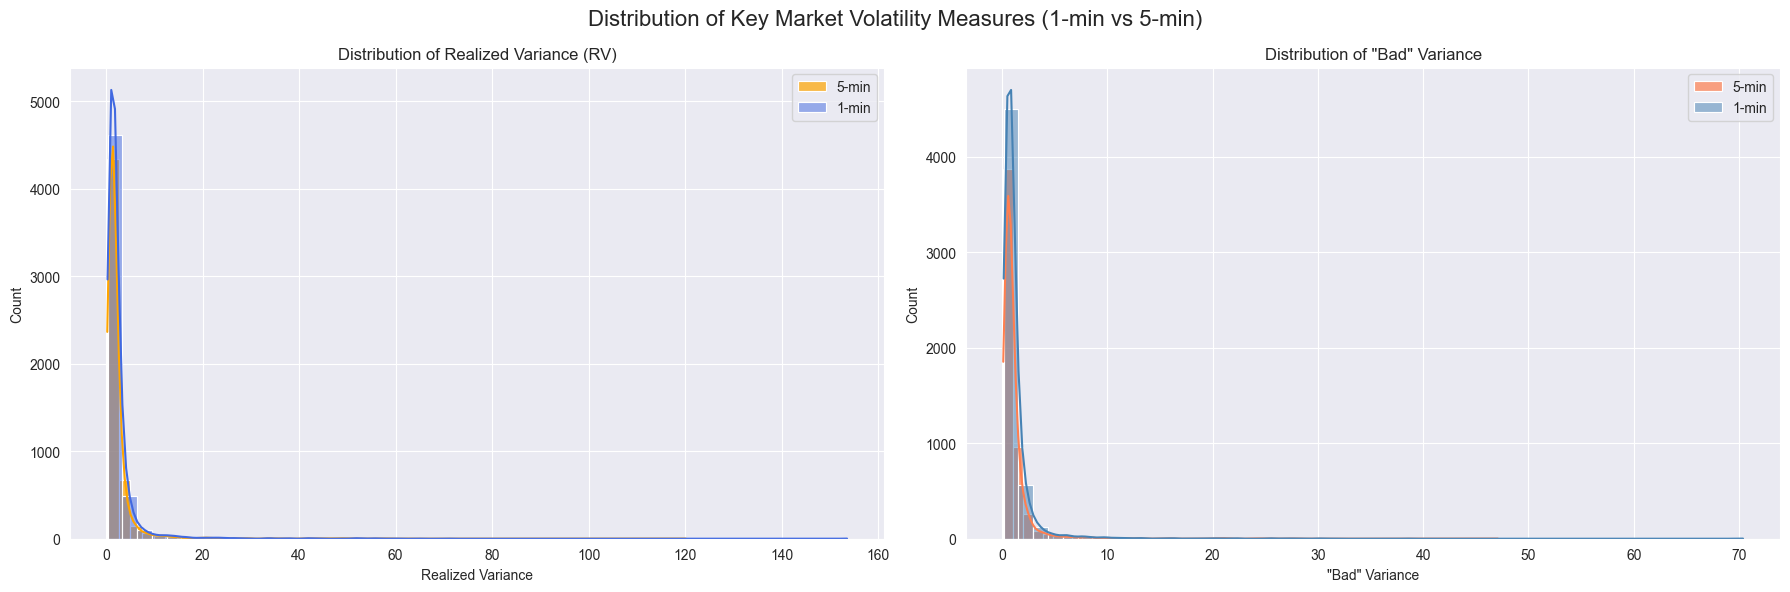

In [32]:
print('Market-Wide Indicators (Summary):')
print("\n[5-min Data Summary]")
display(df_market_5.describe())

print("\n[1-min Data Summary]")
display(df_market_1.describe())

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Distribution of Key Market Volatility Measures (1-min vs 5-min)', fontsize=16)

sns.histplot(df_market_5['rv'].dropna(), kde=True, ax=ax[0], color='orange', bins=50, label='5-min', alpha=0.7)
sns.histplot(df_market_1['rv'].dropna(), kde=True, ax=ax[0], color='royalblue', bins=50, label='1-min', alpha=0.5)
ax[0].set_title('Distribution of Realized Variance (RV)')
ax[0].set_xlabel('Realized Variance')
ax[0].legend()

sns.histplot(df_market_5['bad'].dropna(), kde=True, ax=ax[1], color='coral', bins=50, label='5-min', alpha=0.7)
sns.histplot(df_market_1['bad'].dropna(), kde=True, ax=ax[1], color='steelblue', bins=50, label='1-min', alpha=0.5)
ax[1].set_title('Distribution of "Bad" Variance')
ax[1].set_xlabel('"Bad" Variance')
ax[1].legend()

plt.tight_layout()
plt.show()

## 4. Correlation Analysis

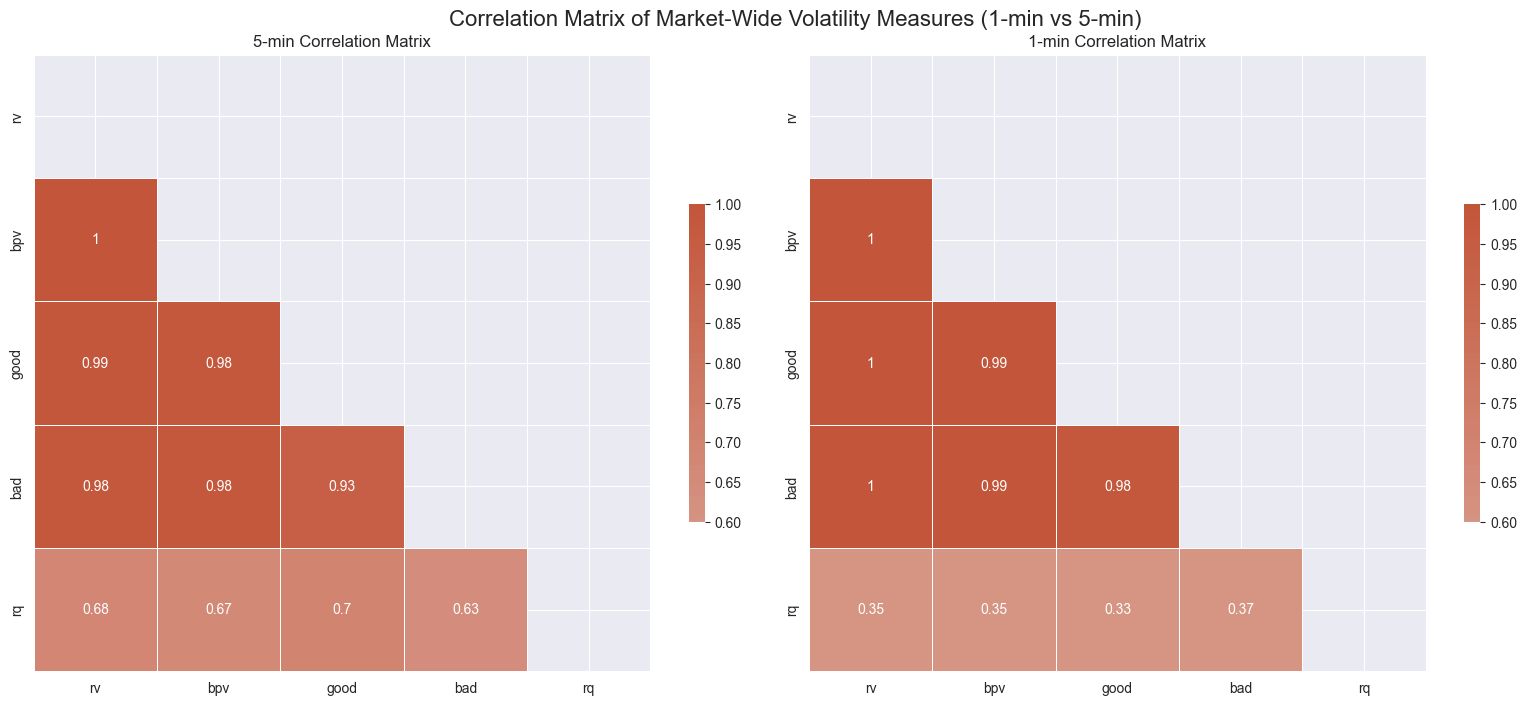


Difference (1-min minus 5-min):


,rv,bpv,good,bad,rq
rv,0.000,-0.001,0.011,0.014,-0.329
bpv,-0.001,0.000,0.011,0.012,-0.322
good,0.011,0.011,0.000,0.049,-0.374
bad,0.014,0.012,0.049,0.000,-0.259
rq,-0.329,-0.322,-0.374,-0.259,0.000


In [33]:
corr_5 = df_market_5.corr()
corr_1 = df_market_1.corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Correlation Matrix of Market-Wide Volatility Measures (1-min vs 5-min)', fontsize=16)

mask = np.triu(np.ones_like(corr_5, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# --- 5-min ---
sns.heatmap(
  corr_5, mask=mask, cmap=cmap, vmin=0.6, vmax=1.0, center=0,
  square=True, annot=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, ax=axes[0]
)
axes[0].set_title('5-min Correlation Matrix')

# --- 1-min ---
sns.heatmap(
  corr_1, mask=mask, cmap=cmap, vmin=0.6, vmax=1.0, center=0,
  square=True, annot=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, ax=axes[1]
)
axes[1].set_title('1-min Correlation Matrix')

plt.tight_layout()
plt.show()

corr_diff = corr_1 - corr_5
print("\nDifference (1-min minus 5-min):")
display(corr_diff.round(3))

## 5. Time Series Analysis

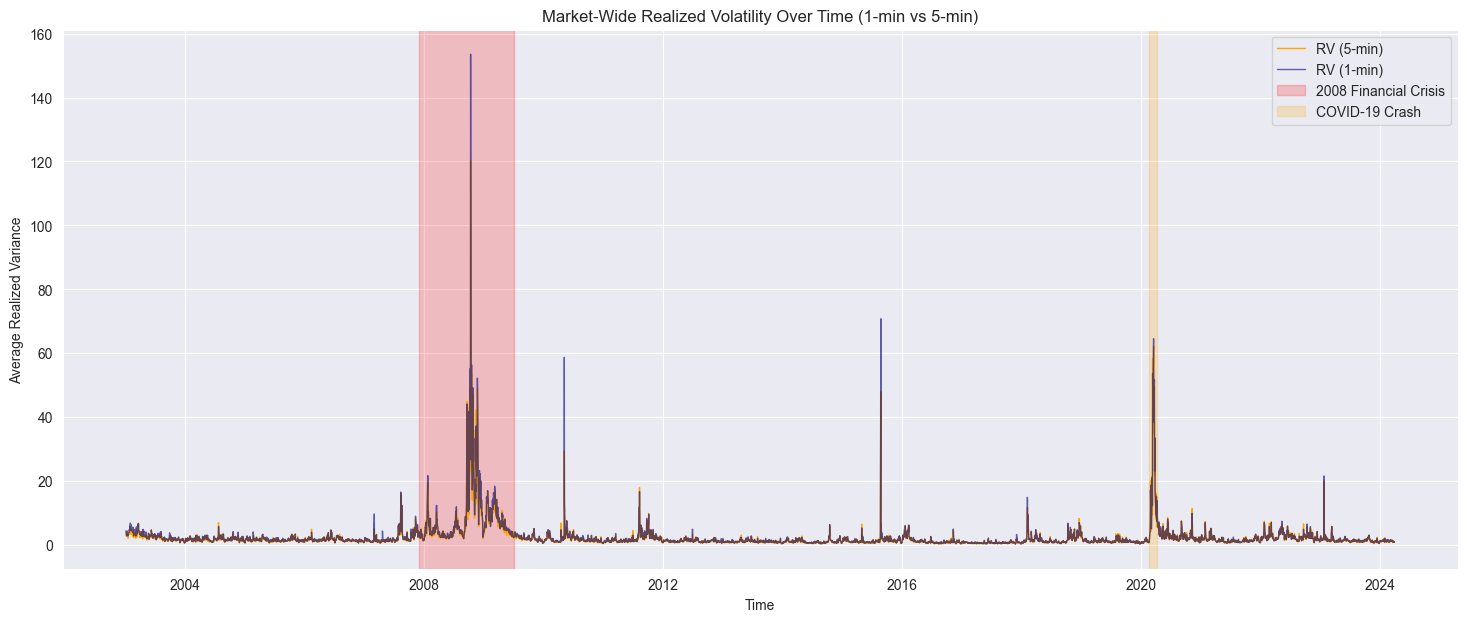

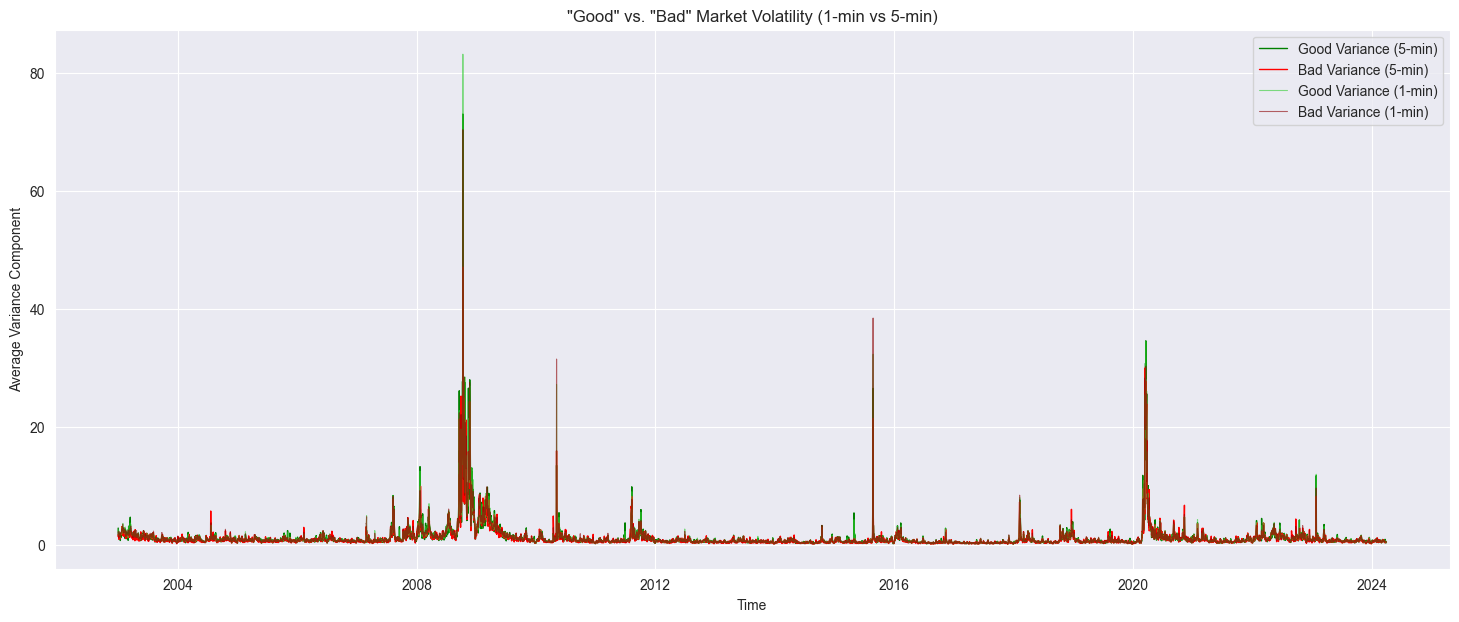

In [34]:
plt.figure(figsize=(18, 7))
plt.plot(df_market_5['rv'], label='RV (5-min)', color='orange', linewidth=1)
plt.plot(df_market_1['rv'], label='RV (1-min)', color='navy', linewidth=1, alpha=0.6)


plt.axvspan('2007-12-01', '2009-06-30', color='red', alpha=0.2, label='2008 Financial Crisis')
plt.axvspan('2020-02-20', '2020-04-07', color='orange', alpha=0.2, label='COVID-19 Crash')

plt.title('Market-Wide Realized Volatility Over Time (1-min vs 5-min)')
plt.xlabel('Time')
plt.ylabel('Average Realized Variance')
plt.legend()
plt.show()

plt.figure(figsize=(18, 7))
plt.plot(df_market_5['good'], label='Good Variance (5-min)', color='green', linewidth=1)
plt.plot(df_market_5['bad'], label='Bad Variance (5-min)', color='red', linewidth=1)
plt.plot(df_market_1['good'], label='Good Variance (1-min)', color='limegreen', linewidth=0.8, alpha=0.6)
plt.plot(df_market_1['bad'], label='Bad Variance (1-min)', color='darkred', linewidth=0.8, alpha=0.6)

plt.title('"Good" vs. "Bad" Market Volatility (1-min vs 5-min)')
plt.xlabel('Time')
plt.ylabel('Average Variance Component')
plt.legend()
plt.show()